In [ ]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
filename = 'COT.nc'
data1 = nc.Dataset(filename)
f = 'CTH.nc'
data2 = nc.Dataset(f)
f = 'VI_B.nc'
data3 = nc.Dataset(f)
f = 'IR.nc'
data4 = nc.Dataset(f)

In [ ]:
vi_b = np.array(data3.variables['image_pixel_values'][:].data)
ir = np.array(data4.variables['image_pixel_values'][:].data)
cot = np.array(data1.variables['COT'][:].data)
cth = np.array(data2.variables['CTH'][:].data)

In [ ]:
cot = cot[1034:1575,1430:1761]
cth = cth[1034:1575,1430:1761]
ir = ir[1034:1575,1430:1761]
vi_b = vi_b[1034*2:1575*2,1430*2:1761*2]


In [ ]:
cot_df = pd.DataFrame(cot)
cth_df = pd.DataFrame(cth)

In [ ]:
cot = np.array(cot_df[cot_df < 158.00])
cth = np.array(cth_df[cth_df < 1600.00])
#np.nan_to_num(cot,0)
#np.nan_to_num(cth,0)


In [ ]:
cot.max()

nan

In [ ]:
cot

array([[      nan,       nan, 12.429999, ...,       nan,       nan,
              nan],
       [      nan,       nan, 12.429999, ...,       nan,       nan,
              nan],
       [      nan,       nan,  8.87    , ...,       nan,       nan,
              nan],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan]], dtype=float32)

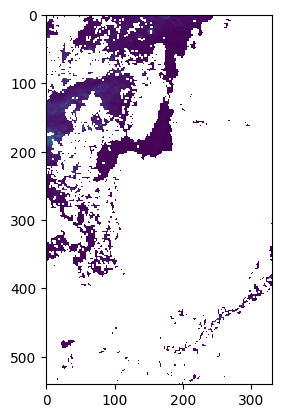

In [ ]:
plt.imshow(cot)
plt.show()

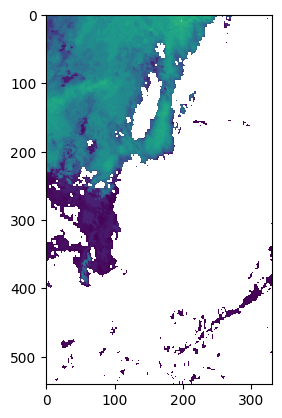

In [ ]:
plt.imshow(cth)
plt.show()

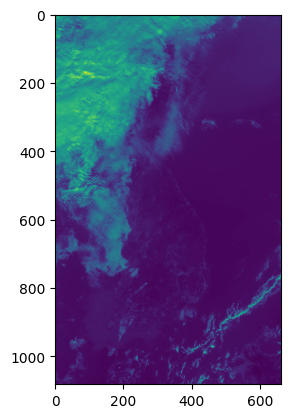

In [ ]:
%matplotlib inline

plt.imshow(vi_b)

plt.show()

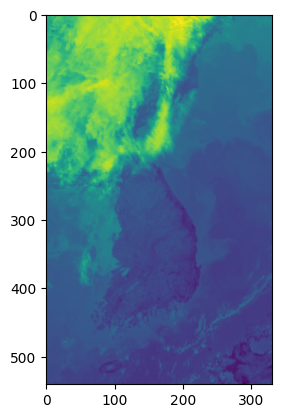

In [ ]:
plt.imshow(ir)
plt.show()

In [ ]:
vi_b_nonnull = np.zeros((541, 331), 'float64')
vi_b_nonnull.shape
lat = np.zeros((541, 331), 'float64')
log = np.zeros((541, 331), 'float64')

In [ ]:
for i in range(0, 541):
    for j in range(0, 331):
        value = (vi_b[i*2][j*2] + vi_b[i*2][j*2 + 1] + vi_b[i*2 + 1][j*2] + vi_b[i*2 + 1][j*2 + 1]) / 4
        vi_b_nonnull[i][j] = value
        lat[i][j] = int(i/2)
        log[i][j] = int(j/2)


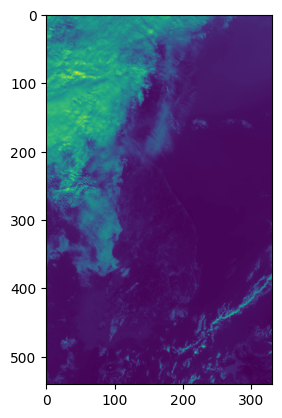

In [ ]:
plt.imshow(vi_b_nonnull)

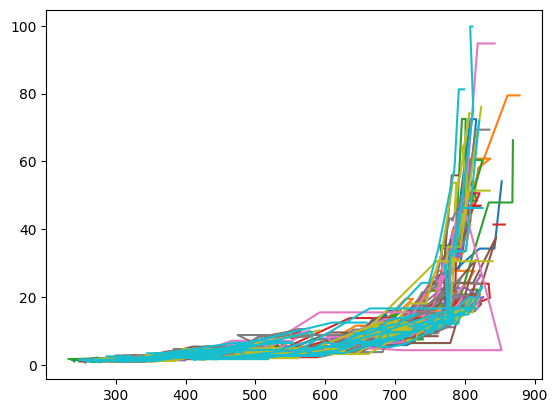

In [ ]:
i = 2134
for i in range(10):
    plt.plot(vi_b_nonnull[:,i],cot[:,i])


In [ ]:
mask =~( np.isnan(cot)|np.isnan(cth)|np.isnan(ir)|np.isnan(vi_b_nonnull))
ncot = cot[mask]
ncth = cth[mask]
nir = ir[mask]
nvi_b = vi_b_nonnull[mask]
nlat = lat[mask]





In [ ]:
import seaborn as sns

<Axes: >

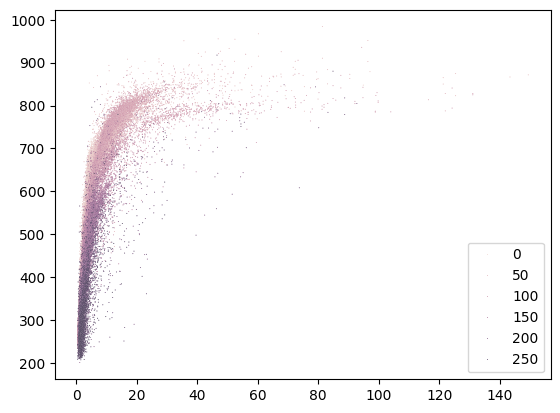

In [ ]:
sns.scatterplot(x = ncot,y = nvi_b,hue = nlat,s = 0.5)

In [ ]:
ncot.shape

(46887,)

In [ ]:
import seaborn as sns

<Axes: >

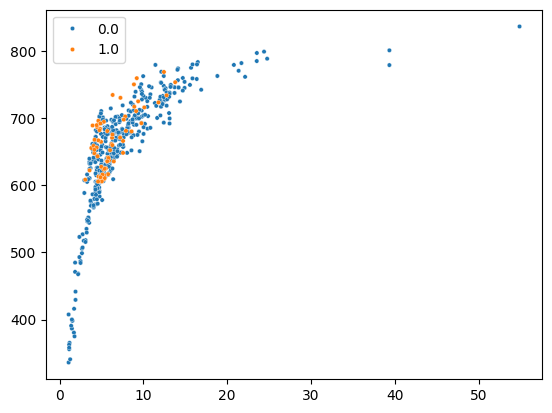

In [ ]:
sns.scatterplot(x= ncot[0:500],y = nvi_b[0:500],s = 10,hue = nlat[0:500])

<Axes: >

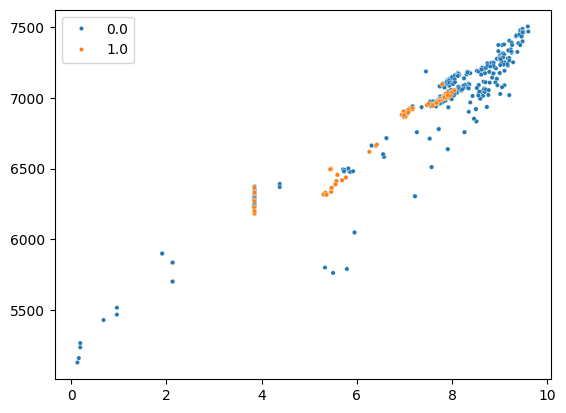

In [ ]:
sns.scatterplot(x= ncth[0:500],y = nir[0:500],s = 10,hue = nlat[0:500])

<Axes: >

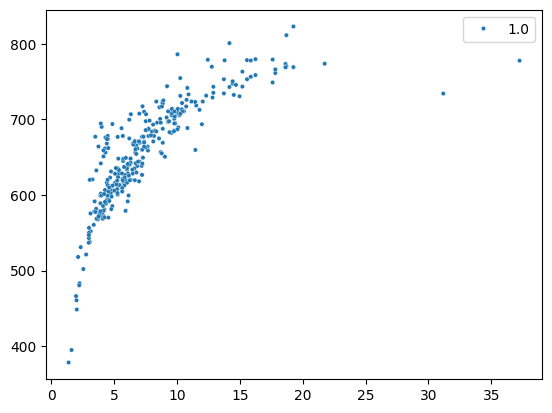

In [ ]:
sns.scatterplot(x= ncot[500:800],y = nvi_b[500:800],s = 10,hue = nlat[500:800])

<Axes: >

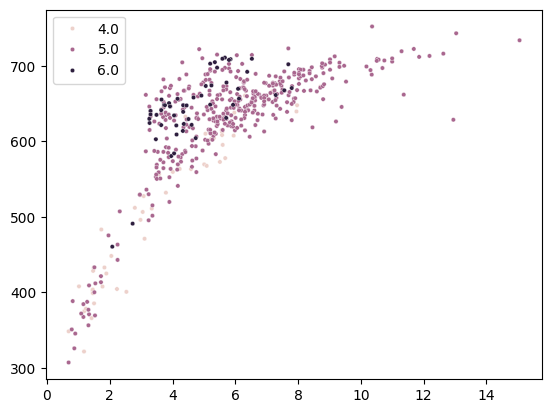

In [ ]:
sns.scatterplot(x= ncot[2000:2500],y = nvi_b[2000:2500],s = 10,hue = nlat[2000:2500])

Model

In [ ]:
import numpy as np
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Sequential

In [ ]:
'''cot = cot.reshape(-1,1)
cth = cth.reshape(-1,1)
ir = ir.reshape(-1,1)
vi_b_nonnull = vi_b_nonnull.reshape(-1,1)
lat = lat.reshape(-1,1)
log = log.reshape(-1,1)

'''

'cot = cot.reshape(-1,1)\ncth = cth.reshape(-1,1)\nir = ir.reshape(-1,1)\nvi_b_nonnull = vi_b_nonnull.reshape(-1,1)\nlat = lat.reshape(-1,1)\nlog = log.reshape(-1,1)\n\n'

In [ ]:
cot[0:10000],vi_b_nonnull[0:10000]

(array([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([[184.  ],
        [185.75],
        [187.  ],
        ...,
        [223.5 ],
        [221.5 ],
        [221.  ]]))

In [ ]:
vi_b_nonnull.max()

1917.0

In [ ]:
ncot.shape[0],cot.shape[0]

(2229470, 7800000)

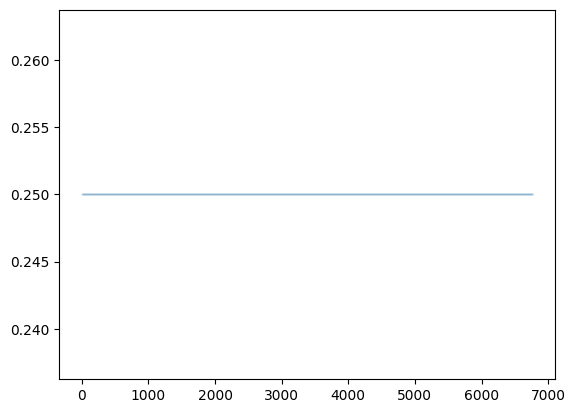

In [ ]:
plt.scatter(np.arange(ncot[0:1000000].shape[0]),ncot[0:1000000],s = 0.01,alpha=0.1)

In [ ]:
ncot = cot[(cot!=0)&(cot<0.26)]
print(ncot.shape[0])


6769


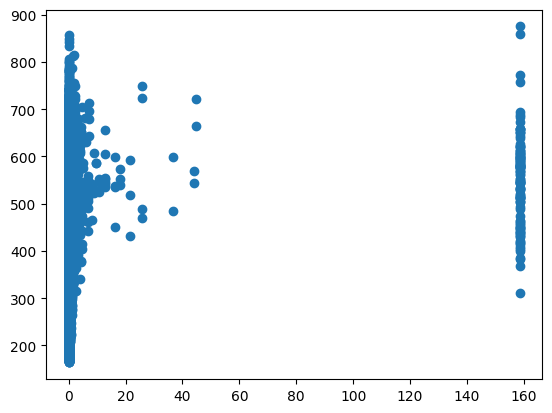

In [ ]:
plt.scatter(cot[0:2000000],vi_b_nonnull[0:2000000])

In [ ]:
log.shape

(541, 331)

In [ ]:
xvi = np.column_stack ((nvi_b,nlat))
xir = np.column_stack((nir, nlat))
y_ir = ncth
y_vi = ncot

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_vi = MinMaxScaler()
scaler_vi.fit(xvi)
xvi = scaler_vi.transform(xvi)
#print(np.round(data,decimals = 2))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_ir = MinMaxScaler()
scaler_ir.fit(xir)
xir = scaler_ir.transform(xir)
#print(np.round(data,decimals = 2))

In [ ]:
from sklearn.model_selection import train_test_split
train_data_vi, test_data_vi, train_target_vi, test_target_vi = train_test_split(xvi, y_vi)

In [ ]:
from sklearn.model_selection import train_test_split
train_data_ir, test_data_ir, train_target_ir, test_target_ir = train_test_split(xir, y_ir)

In [ ]:
xvi

array([[0.69837217, 0.        ],
       [0.73156719, 0.        ],
       [0.72518353, 0.        ],
       ...,
       [0.05936802, 1.        ],
       [0.06192148, 1.        ],
       [0.01883179, 1.        ]])

In [ ]:
train_data_vi.shape,train_target_vi.shape

((35165, 2), (35165,))

In [ ]:
modelvi = Sequential()
model_ir = Sequential()
modelvi.add(Dense(64,input_dim = 2, activation='relu'))
modelvi.add(Dense(128, activation='relu'))
modelvi.add(Dropout(0.2))
modelvi.add(Dense(64, activation='relu'))
modelvi.add(Dense(1))
modelvi.compile(optimizer='adam', loss='mse', metrics='accuracy')

model_ir.add(Dense(64,input_dim = 2, activation='relu'))
model_ir.add(Dense(128, activation='relu'))
model_ir.add(Dropout(0.2))
model_ir.add(Dense(64, activation='relu'))
model_ir.add(Dense(1))
model_ir.compile(optimizer='adam', loss='mse', metrics='mae')

In [ ]:
model_ir.fit(train_data_ir,train_target_ir,epochs=10)


Epoch 1/10
1099/1099 [==============================] - 3s 2ms/step - loss: 1.4579 - mae: 0.7082
Epoch 2/10
1099/1099 [==============================] - 1s 1ms/step - loss: 0.6520 - mae: 0.5316
Epoch 3/10
1099/1099 [==============================] - 1s 1ms/step - loss: 0.6239 - mae: 0.5168
Epoch 4/10
1099/1099 [==============================] - 2s 1ms/step - loss: 0.5916 - mae: 0.4974
Epoch 5/10
1099/1099 [==============================] - 2s 1ms/step - loss: 0.5699 - mae: 0.4815
Epoch 6/10
1099/1099 [==============================] - 2s 1ms/step - loss: 0.5472 - mae: 0.4672
Epoch 7/10
1099/1099 [==============================] - 1s 1ms/step - loss: 0.5281 - mae: 0.4575
Epoch 8/10
1099/1099 [==============================] - 1s 1ms/step - loss: 0.5133 - mae: 0.4496
Epoch 9/10
1099/1099 [==============================] - 1s 1ms/step - loss: 0.5119 - mae: 0.4497
Epoch 10/10
1099/1099 [==============================] - 2s 2ms/step - loss: 0.5076 - mae: 0.4467


In [ ]:
modelvi.fit(train_data_vi,train_target_vi,epochs=10)


Epoch 1/10
1099/1099 [==============================] - 2s 1ms/step - loss: 27.1519 - accuracy: 0.0019
Epoch 2/10
1099/1099 [==============================] - 2s 2ms/step - loss: 19.1696 - accuracy: 0.0020
Epoch 3/10
1099/1099 [==============================] - 2s 2ms/step - loss: 18.7416 - accuracy: 0.0021
Epoch 4/10
1099/1099 [==============================] - 2s 2ms/step - loss: 18.6304 - accuracy: 0.0021
Epoch 5/10
1099/1099 [==============================] - 1s 1ms/step - loss: 18.2194 - accuracy: 0.0021
Epoch 6/10
1099/1099 [==============================] - 2s 1ms/step - loss: 17.9746 - accuracy: 0.0021
Epoch 7/10
1099/1099 [==============================] - 2s 1ms/step - loss: 17.7380 - accuracy: 0.0021
Epoch 8/10
1099/1099 [==============================] - 2s 1ms/step - loss: 17.4687 - accuracy: 0.0020
Epoch 9/10
1099/1099 [==============================] - 2s 1ms/step - loss: 17.3053 - accuracy: 0.0021
Epoch 10/10
1099/1099 [==============================] - 2s 1ms/step - lo

In [ ]:
pre = modelvi.predict(test_data_vi)
precth = model_ir.predict(test_data_ir)

367/367 [==============================] - 0s 777us/step


ValueError: x and y must be the same size

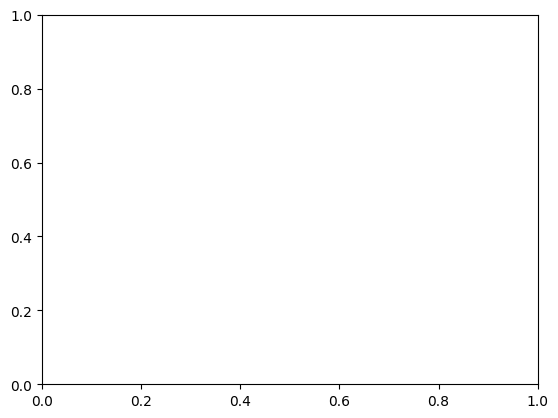

In [ ]:
plt.scatter(train_data_vi,pre,s = 0.5)

In [ ]:
plt.scatter(pre,train_target_vi,s = 0.5)

In [ ]:
train_target_vi.max()

143.42

In [ ]:
from sklearn.metrics import r2_score


In [ ]:
r2_score(test_target_vi,pre)

0.7560571981803612

In [ ]:
r2_score(test_target_ir,precth)

0.9536082535745276

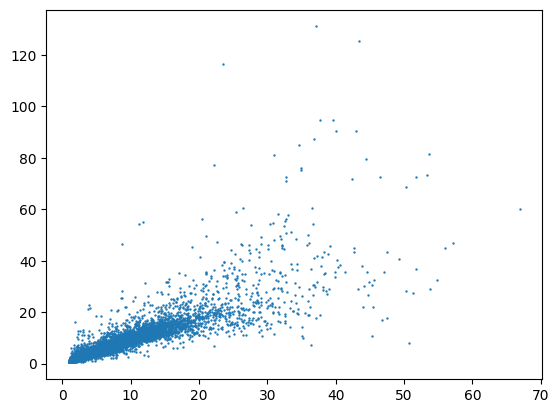

In [ ]:
plt.scatter(pre,test_target_vi,s = 0.5)

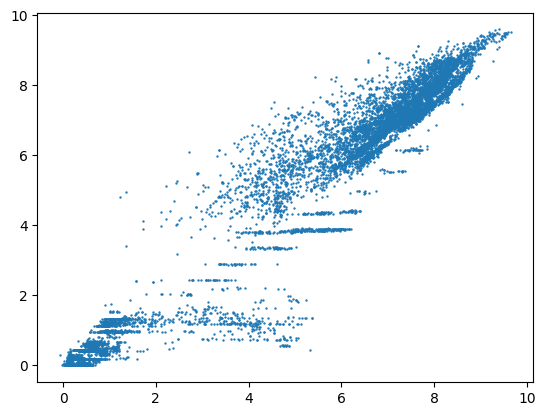

In [ ]:
plt.scatter(precth,test_target_ir,s = 0.5)

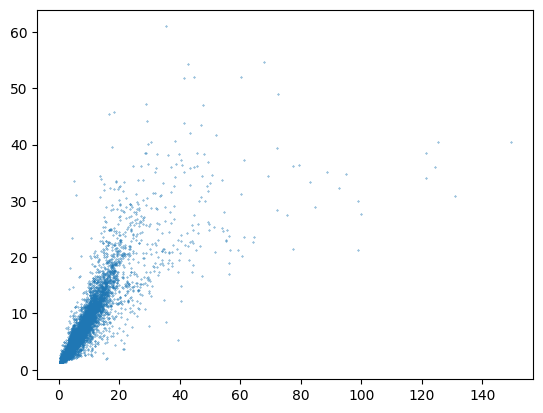

In [ ]:
plt.scatter(test_target_vi, pre,s = 0.1)

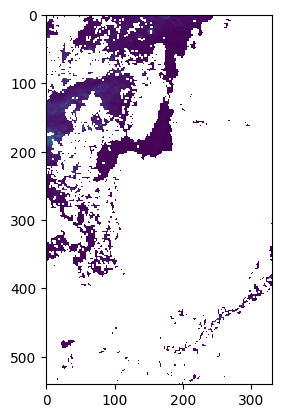

In [ ]:

plt.imshow(cot)

In [ ]:

plt.imshow(modelvi.predict(scaler.transform(np.column_stack((vi_b_nonnull.flatten().reshape(-1,1),lat.flatten()))).reshape(541,331)))


ValueError: cannot reshape array of size 358142 into shape (541,331)

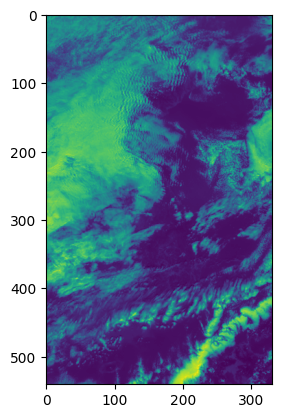

In [ ]:
filename = 'vi.nc'
data1 = nc.Dataset(filename)
vi = np.array(data1.variables['image_pixel_values'][:].data)
vi = vi[1034*2:1575*2,1430*2:1761*2]
svi = np.zeros((541, 331), 'float64')
nnlat = np.zeros((541, 331), 'float64')
for i in range(0, 541):
    for j in range(0, 331):
        value = (vi[i*2][j*2] + vi[i*2][j*2 + 1] + vi[i*2 + 1][j*2] + vi[i*2 + 1][j*2 + 1]) / 4
        svi[i][j] = value
        nnlat[i][j] = int(i/2)
plt.imshow(svi)

In [ ]:
data = scaler_vi.transform(np.column_stack((svi.flatten().reshape(-1,1),nnlat.flatten())))
img = modelvi.predict(data).reshape(541,331)


5596/5596 [==============================] - 4s 742us/step


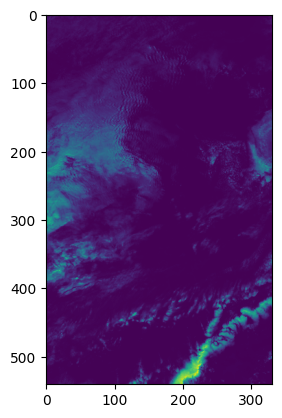

In [ ]:
plt.imshow(img)

In [ ]:
img.max()

98.43268

In [ ]:
img2 = img*10

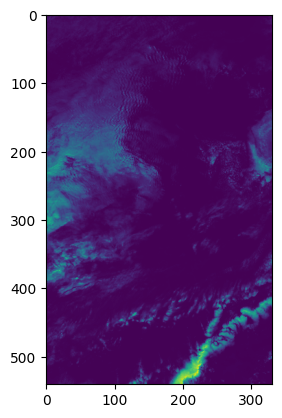

In [ ]:
plt.imshow(img)

In [ ]:
filename = 'cot2.nc'
data1 = nc.Dataset(filename)
co = np.array(data1.variables['COT'][:].data)
co = co[1034:1575,1430:1761]
co_df = pd.DataFrame(co)
co = np.array(co_df[co_df < 160.00])
np.nan_to_num(co,0)

array([[3.6399999, 3.1      , 3.59     , ..., 1.4      , 1.74     ,
        1.38     ],
       [3.6399999, 3.1      , 3.59     , ..., 1.87     , 1.8399999,
        2.04     ],
       [3.4099998, 3.3799999, 0.       , ..., 1.87     , 1.8399999,
        2.04     ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]], dtype=float32)

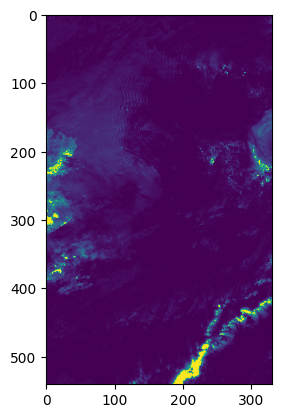

In [ ]:
plt.imshow(co)

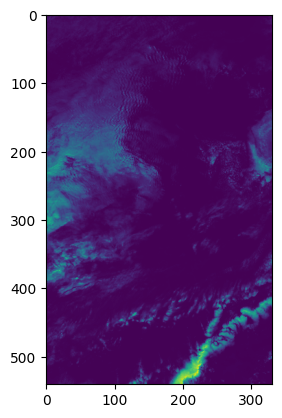

In [ ]:
plt.imshow(img)

In [ ]:
co.max(),img.max()

(19.99, 17.830505)

In [ ]:
img[img<0] = 0

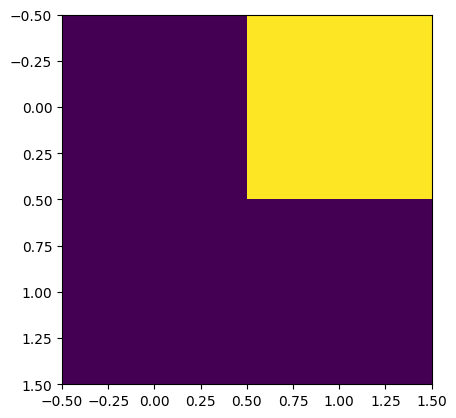

In [ ]:
plt.imshow([[co[210,20],img[210,20]],[0,0]])

In [ ]:
co[210,20],img[210,20]

(88.46, 15.279591)

In [ ]:
np.nan_to_num(co,0)

array([[3.6399999, 3.1      , 3.59     , ..., 1.4      , 1.74     ,
        1.38     ],
       [3.6399999, 3.1      , 3.59     , ..., 1.87     , 1.8399999,
        2.04     ],
       [3.4099998, 3.3799999, 0.       , ..., 1.87     , 1.8399999,
        2.04     ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]], dtype=float32)

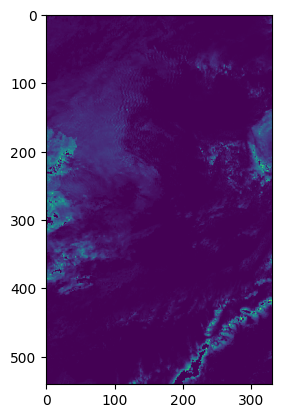

In [ ]:
plt.imshow(co)

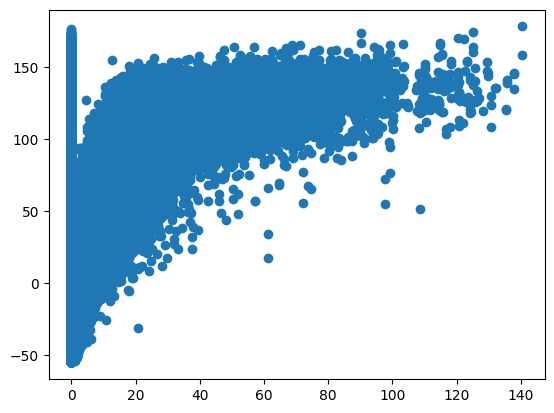

In [ ]:
plt.scatter(co.flatten(),img2.flatten())

In [ ]:
f = 'ir2.nc'
data4 = nc.Dataset(f)
nnir = np.array(data4.variables['image_pixel_values'][:].data)
nnir = nnir[1034:1575,1430:1761]

In [ ]:
data_ir = scaler_ir.transform(np.column_stack((nnir.flatten().reshape(-1,1),nnlat.flatten())))
img_ir = model_ir.predict(data_ir).reshape(541,331)


5596/5596 [==============================] - 9s 2ms/step


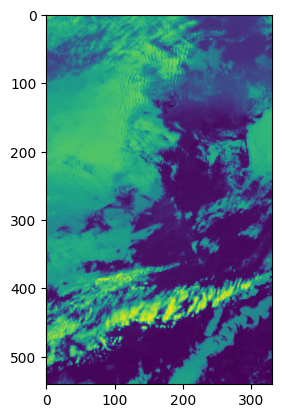

In [ ]:
plt.imshow(img_ir)

In [ ]:
f = 'nncth.nc'
data2 = nc.Dataset(f)
nncth = np.array(data2.variables['CTH'][:].data)
nncth = nncth[1034:1575,1430:1761]
nncth_df = pd.DataFrame(nncth)
nncth = np.array(nncth_df[nncth_df < 1600.00])
nncth = np.nan_to_num(nncth)

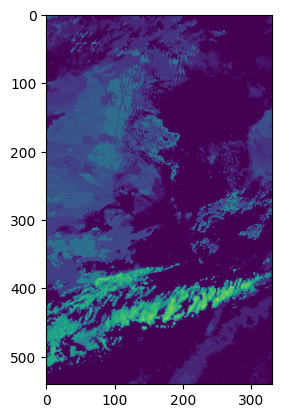

In [ ]:
plt.imshow(nncth)